In [10]:
import itertools

import numpy as np
from qutip import *
# some_file.py
from mpl_toolkits.mplot3d import Axes3D

from qudit import *
# import scipy
import time
import IPython.display as disp
from tqdm.notebook import tqdm
import multiprocess as mp
import matplotlib.pyplot as plt
from discrete_simulation import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
d = 16
m_i = 16
m_c = 16
fidelity_cut = 0
gamma_list = np.logspace(-3,-1,11)
gamma_ratio = 1


simulation16 = DiscreteSimulation(d, m_i,m_c )

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation16.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list1616 = [tup[0] for tup in fid_prob_list]
prob_list1616 = [tup[1] for tup in fid_prob_list]

print(1)

m_i = 16
m_c = 8
simulation8 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation8.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list_168 = [tup[0] for tup in fid_prob_list]
prob_list_168 = [tup[1] for tup in fid_prob_list]

print(2)

m_i = 16
m_c = 4
simulation4 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation4.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list_164 = [tup[0] for tup in fid_prob_list]
prob_list_164 = [tup[1] for tup in fid_prob_list]

print(3)

m_i = 16
m_c = 2
simulation2 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation2.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list_162 = [tup[0] for tup in fid_prob_list]
prob_list_162 = [tup[1] for tup in fid_prob_list]


print(4)

m_i = 16
m_c = 8
simulation8 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation8.average_fidelity_no_communication, zip(list(gamma_list),list(gamma_ratio*gamma_list)))
fid_list_168_NC = [tup[0] for tup in fid_prob_list]
prob_list_168_NC = [tup[1] for tup in fid_prob_list]

print(5)

m_i = 16
m_c = 4
simulation4 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation4.average_fidelity_no_communication, zip(list(gamma_list),list(gamma_ratio*gamma_list)))
fid_list_164_NC = [tup[0] for tup in fid_prob_list]
prob_list_164_NC = [tup[1] for tup in fid_prob_list]

1
2
3
4
5


In [3]:
m_i = 16
m_c = 8
m_f= 4
simulation2 = DiscreteSimulation(d, m_i,m_c, m_f=m_f)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation2.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list)))
fid_list_1684 = [tup[0] for tup in fid_prob_list]
prob_list_1684 = [tup[1] for tup in fid_prob_list]

In [130]:
m_i = 16
m_c = 2
simulation2 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation2.average_fidelity_no_communication, zip(list(gamma_list),list(gamma_ratio*gamma_list)))
fid_list_162_NC = [tup[0] for tup in fid_prob_list]
prob_list_162_NC = [tup[1] for tup in fid_prob_list]

In [165]:
d=16
m_i=16
qudit4 = EntangledQudit(d,d)

def trivial_fidelity_for_parallel(gamma, d=d, qudit4=qudit4,m_i=m_i):
    import itertools
    print(m_i)
    fid_prob = sum([(qudit4.fidelity_trivial(m_i,s_A,s_B,l_A,l_B)
                     * qudit4.p(gamma_loss_A=gamma, gamma_dephasing_A=gamma, s_A=s_A, s_B=s_B, l_A=l_A, l_B=l_B))
                    for s_A,s_B,l_A,l_B in itertools.product(range(d),range(d), range(d), range(d))])
    prob = sum([qudit4.p(gamma_loss_A=gamma, gamma_dephasing_A=gamma,
                s_A=s_A, s_B=s_B, l_A=l_A, l_B=l_B)
                for s_A,s_B,l_A,l_B in itertools.product(range(d),range(d), range(d), range(d))])
    return fid_prob/prob

# trivial_fidelity_for_parallel(1e-3)
with mp.Pool(mp.cpu_count()-1) as pool:
    fid_triv_list8 = pool.map(trivial_fidelity_for_parallel, list(gamma_list))

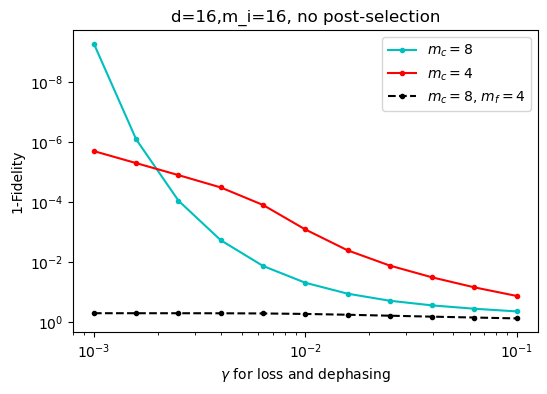

In [5]:
plt.figure(dpi=100)

# plt.loglog(gamma_list,1-np.array(fid_list1616), 'b.-', label="m_c=16")
plt.loglog(gamma_list,1-np.array(fid_list_168), 'c.-', label="$m_c=8$")
plt.loglog(gamma_list,1-np.array(fid_list_164), 'r.-', label="$m_c=4$")
# plt.loglog(gamma_list,1-np.array(fid_list_162), 'g.-', label="m_c=2")
# plt.loglog(gamma_list,1-np.array(fid_list_168_NC), 'c.--', label="m_c=8 no comm")
# plt.loglog(gamma_list,1-np.array(fid_list_164_NC), 'r.--', label="m_c=4 no comm")
# plt.loglog(gamma_list,1-np.array(fid_triv_list8), 'c.-', label="m_c=2 triv")
# plt.loglog(gamma_list,1-np.array(fid_list_162_NC), 'k.--', label="m_c=2 no comm")
plt.loglog(gamma_list,1-np.array(fid_list_1684), 'k.--', label="$m_c=8$, $m_f=4$")
# plt.loglog(gamma_list,1-np.array(fid_list_filtered), 'r.-')
# plt.loglog(gamma_list,np.array(fail_prob_list), 'g.--')

# plt.title("Infidelity with trivial protocol and with our protocol. d = 16, m_i = 4, m_c=4")
plt.xlabel(f"$\gamma$ for loss and dephasing")  # decay and 1/{gamma_ratio} 
plt.ylabel("1-Fidelity")
# plt.ylim([1,1e-5])
plt.legend()
plt.title(f"{d=},{m_i=}, no post-selection")
plt.gca().invert_yaxis()

Text(0.5, 1.0, 'd=16,m_i=16, no post-selection')

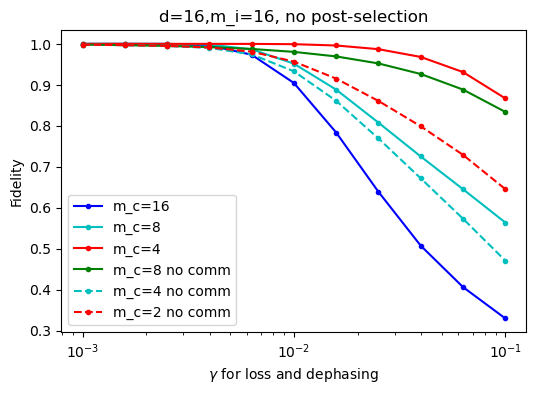

In [131]:
plt.figure(dpi=100)

legend = ["m_c=16","m_c=8","m_c=4", "m_c=8 no comm", "m_c=4 no comm", "m_c=2 no comm"]

plt.plot(gamma_list,np.array(fid_list1616), 'b.-')
plt.plot(gamma_list,np.array(fid_list_168), 'c.-')
plt.plot(gamma_list,np.array(fid_list_164), 'r.-')
plt.plot(gamma_list,np.array(fid_list_162), 'g.-')
plt.plot(gamma_list,np.array(fid_list_168_NC), 'c.--')
plt.plot(gamma_list,np.array(fid_list_164_NC), 'r.--')
# plt.loglog(gamma_list,1-np.array(fid_list_162_NC), 'k.--')
# plt.loglog(gamma_list,1-np.array(fid_list_filtered), 'r.-')
# plt.loglog(gamma_list,np.array(fail_prob_list), 'g.--')
plt.xscale('log')

# plt.title("Infidelity with trivial protocol and with our protocol. d = 16, m_i = 4, m_c=4")
plt.xlabel(f"$\gamma$ for loss and dephasing")  # decay and 1/{gamma_ratio} 
plt.ylabel("Fidelity")
# plt.ylim([1,1e-5])
plt.legend(legend)
plt.title(f"{d=},{m_i=}, no post-selection")
# plt.gca().invert_yaxis()

In [69]:
np.diff(np.array(fid_list_168))

array([-8.15547629e-12, -1.12971521e-10, -1.56073421e-09, -2.14466559e-08,
       -2.91676835e-07, -3.88855304e-06, -4.98880868e-05])

Text(0, 0.5, '1-error probability')

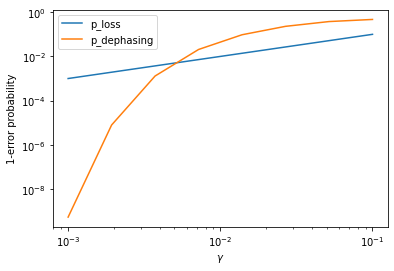

In [94]:
plt.loglog(gamma_list, [simulation4.enQudit.quditA.p_loss(gamma, 1) for gamma in gamma_list])
plt.loglog(gamma_list, [simulation4.enQudit.quditA.p_dephasing(gamma, 1) for gamma in gamma_list])

plt.legend(["p_loss","p_dephasing"])
plt.xlabel(f"$\gamma$")
plt.ylabel(f"1-error probability")

In [62]:
gamma_loss = 1e-2
gamma_dephasing = 1e-2

p_dephasing_notgood = simulation4.enQudit.p(gamma_loss,gamma_dephasing,0,1,0,0)/simulation4.probability_sum(gamma_loss,gamma_dephasing)/4 * 4
# multiply by m_i/m_f = 8 to get the real probabilities
p_loss_notgood = simulation4.enQudit.p(gamma_loss,gamma_dephasing,0,0,1,0)/simulation4.probability_sum(gamma_loss,gamma_dephasing)/2 * 2
# multiply by m_i/m_f = 8 to get the real probabilities

print(f"{p_dephasing_notgood=}")
print(f"{p_loss_notgood=}")
print(f"total estimatied fidelity: {1- (p_loss_notgood + p_dephasing_notgood)}")

simulation4.average_fidelity(gamma_loss,gamma_dephasing)


p_dephasing_notgood=0.023098186112775473
p_loss_notgood=0.008853955808297353
total estimatied fidelity: 0.9680478580789271


(0.9991880126581195, 0.0)

In [59]:
simulation4.probability_sum(1e-3,1e-3)

4.008008005336003

In [52]:
simulation4.enQudit.p(1e-3,1e-3,0,0,0,0)/simulation4.probability_sum(1e-3,1e-3)
# multiply by m_i/m_f = 8 to get the real probabilities

0.9980019976038036

In [68]:
gamma_loss = 1e-3
gamma_dephasing = 1e-3
A_1,B_1,A_2,B_2 = 0,0,1,7
m_i = 16
m_c = 16

f = simulation4.enQudit.fidelity_specific(gamma_loss_A=gamma_loss, gamma_dephasing_A=gamma_dephasing, A_1=A_1,
                                                 B_1=B_1, A_2=A_2,
                                                 B_2=B_2, m_i=m_i, m_c=m_c)
p = simulation4.enQudit.probability_specific(gamma_loss_A=gamma_loss, gamma_dephasing_A=gamma_dephasing, A_1=A_1,
                                                 B_1=B_1, A_2=A_2,
                                                 B_2=B_2, m_i=m_i, m_c=m_c)
print(f"{f=}")
print(f"{p=}")

f=6.349206342440267e-27
p=4.0


In [74]:
1-simulation4.average_fidelity(gamma_loss = gamma_loss, gamma_dephasing=gamma_dephasing)[0]

1.9973346673252124e-06

In [14]:
m_i = 16
m_c = 4
simulation4 = DiscreteSimulation(d, m_i,m_c)

simulation4.average_fidelity(gamma_loss = 10e-2, gamma_dephasing=10e-2)

In [30]:
gamma_loss = 1e-2
gamma_dephasing = 1e-2
A_1, B_1 = 0,3
A_2, B_2 = 0,0
m_i = 16
m_c = 4

print(simulation4.enQudit.fidelity_specific(gamma_loss_A=gamma_loss, gamma_dephasing_A=gamma_dephasing, 
                                      A_1=A_1, B_1=B_1, A_2=A_2, B_2=B_2, m_i=m_i, m_c=m_c))
print(simulation4.enQudit.fidelity_specific(gamma_loss_A=gamma_loss, gamma_dephasing_A=gamma_dephasing, 
                                      A_1=A_1, B_1=B_1, A_2=A_2, B_2=B_2, m_i=m_i, m_c=m_c,no_com=True))

0.9998000379678909
2.02535443505119e-09


In [22]:
a = zip(list(gamma_list),list(gamma_list), [fidelity_cut] * len(gamma_list))

In [26]:
a.__next__()

(0.03162277660168379, 0.03162277660168379, 0.999)

In [10]:
d = 16
qudit4 = EntangledQudit(d,d)
a = qudit4.probability_list(1e-2,1e-2)
a.sort(reverse=True)
a

[3.6131270320650555,
 0.09425920169776378,
 0.09425920169776378,
 0.09425920169776378,
 0.09425920169776378,
 0.036131270320650555,
 0.036131270320650555,
 0.0024590325847529573,
 0.0024590325847529573,
 0.0024590325847529573,
 0.0024590325847529573,
 0.0009425920169776378,
 0.0009425920169776378,
 0.0009425920169776378,
 0.0009425920169776378,
 0.0009425920169776378,
 0.0009425920169776378,
 0.0009425920169776378,
 0.0009425920169776378,
 0.00036131270320650553,
 0.0001806563516032528,
 0.0001806563516032528,
 2.4590325847529575e-05,
 2.4590325847529575e-05,
 2.4590325847529575e-05,
 2.4590325847529575e-05,
 2.4590325847529575e-05,
 2.4590325847529575e-05,
 2.4590325847529575e-05,
 2.4590325847529575e-05,
 9.425920169776379e-06,
 9.425920169776379e-06,
 9.425920169776379e-06,
 9.425920169776379e-06,
 4.7129600848881895e-06,
 4.7129600848881895e-06,
 4.7129600848881895e-06,
 4.7129600848881895e-06,
 4.7129600848881895e-06,
 4.7129600848881895e-06,
 4.7129600848881895e-06,
 4.7129600848

In [4]:
d = 16
qudit4 = EntangledQudit(d,d)
m_i = 16
m_c = 4
A_1, B_1 = 0, 3
A_2, B_2 = 1, 1
qudit4.fidelity_specific(gamma_loss_A=1e-2,gamma_dephasing_A=1e-2, A_1=A_1,B_1=B_1,A_2=A_2,B_2=B_2,m_i=m_i,m_c=m_c)

0.9998000379678909

In [5]:
1-fid_list[0][0]

6.656897255652439e-13

In [7]:
fid_list2

[0.9999999999993343, 0, 0, 0]

In [ ]:


# Create some sample data
x = np.logspace(0, 2, 100)
y = np.logspace(0, 2, 100)
x, y = np.meshgrid(x, y)
z = x ** 2 + y ** 2

# Create a figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface using log scale for all three axes
ax.plot_surface(np.log10(x), np.log10(y), np.log10(z))

# Set log scale for all axes
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_zscale('log')

# Set axis labels
ax.set_xlabel('Log X')
ax.set_ylabel('Log Y')
ax.set_zlabel('Log Z')

# Show the plot
plt.show()

In [29]:
d = 16
m_i = 16
m_c = 8
fidelity_cut = 1

simulation16 = DiscreteSimulation(d, m_i,m_c )

simulation16.average_fidelity(gamma_loss=1e-2,gamma_dephasing=1e-2, fidelity_cut=0.5)

(0.9986425150010688, 0.09425920207965674)

In [19]:
d = 32
fidelity_cut = 0
gamma_list = np.logspace(-3,-1,8)
gamma_ratio = 1

m_i = 16
m_c = 8
simulation8 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation8.average_fidelity, itertools.product(list(gamma_list),list(gamma_ratio*gamma_list),[fidelity_cut]))
fid_array_168 = [tup[0] for tup in fid_prob_list]
prob_array_168 = [tup[1] for tup in fid_prob_list]

print(2)

m_i = 16
m_c = 4
simulation4 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation4.average_fidelity, itertools.product(list(gamma_list),list(gamma_ratio*gamma_list),[fidelity_cut]))
fid_array_164 = [tup[0] for tup in fid_prob_list]
prob_array_164 = [tup[1] for tup in fid_prob_list]


2


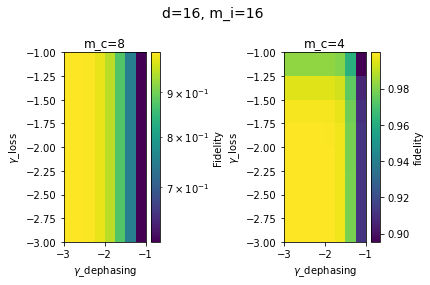

In [70]:
import matplotlib.colors as colors

# Reshape data arrays into 2D grid with the correct shape
N = int(np.sqrt(len(fid_array_164)))  # assuming it's a perfect square
fid_array_168_2d = np.array(fid_array_168).reshape(N, N)
fid_array_164_2d = np.array(fid_array_164).reshape(N, N)

# create a grid of gamma values
gamma1, gamma2 = np.meshgrid(gamma_list, gamma_ratio * gamma_list)

# Create a new figure
plt.figure()
plt.suptitle(f"{d=}, {m_i=}", fontsize=14)

# Display fidelity data
plt.subplot(1, 2, 1)
plt.title('m_c=8')
# plt.gca().set_xscale('log')
# plt.gca().set_yscale('log')
plt.imshow(fid_array_168_2d, extent=[-3, -1, -3, -1], origin='lower', aspect='auto', norm=colors.LogNorm())
plt.colorbar(label='Fidelity')
plt.ylabel('$\gamma$_loss')
plt.xlabel('$\gamma$_dephasing')


# Display probability data
plt.subplot(1, 2, 2)
plt.title('m_c=4')
plt.imshow(fid_array_164_2d, extent=[-3, -1, -3, -1], origin='lower', aspect='auto')
plt.colorbar(label='fidelity')
plt.ylabel('$\gamma$_loss')
plt.xlabel('$\gamma$_dephasing')

plt.tight_layout()
plt.show()

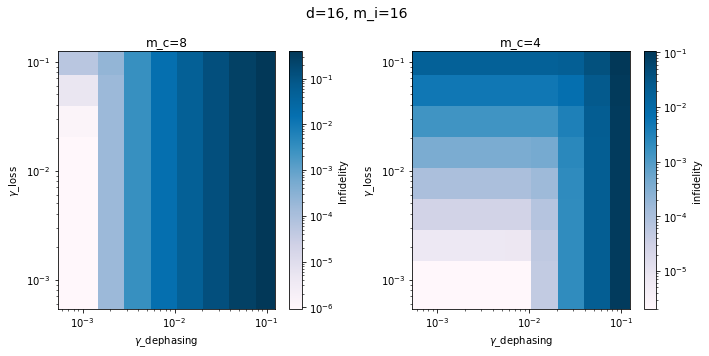

In [87]:
# Assuming fid_array_168 and prob_array_168 are already reshaped into 2D
fid_array_168_2d = np.array(fid_array_168).reshape(len(gamma_list), len(gamma_list))
fid_array_164_2d = np.array(fid_array_164).reshape(len(gamma_list), len(gamma_list))

# Create a grid of gamma values
gamma1, gamma2 = np.meshgrid(gamma_list, gamma_ratio * gamma_list)

# Create a new figure
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle(f"{d=}, {m_i=}", fontsize=14)

# Display fidelity data
pcm0 = axs[0].pcolormesh(gamma1, gamma2, 1-fid_array_168_2d, cmap='PuBu', norm=colors.LogNorm(), shading='auto')
fig.colorbar(pcm0, ax=axs[0], label='Infidelity')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylabel('$\gamma$_loss')
axs[0].set_xlabel('$\gamma$_dephasing')
axs[0].set_title('m_c=8')

# Display probability data
pcm1 = axs[1].pcolormesh(gamma1, gamma2, 1-fid_array_164_2d, cmap='PuBu', norm=colors.LogNorm())
fig.colorbar(pcm1, ax=axs[1], label='infidelity')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_ylabel('$\gamma$_loss')
axs[1].set_xlabel('$\gamma$_dephasing')
axs[1].set_title('m_c=4')

plt.tight_layout()
plt.show()

In [100]:
list(itertools.product(list(gamma_list),list(gamma_ratio*gamma_list),[fidelity_cut]))

[(0.001, 0.001, 0),
 (0.001, 0.0019306977288832496, 0),
 (0.001, 0.003727593720314938, 0),
 (0.001, 0.0071968567300115215, 0),
 (0.001, 0.013894954943731374, 0),
 (0.001, 0.026826957952797246, 0),
 (0.001, 0.0517947467923121, 0),
 (0.001, 0.1, 0),
 (0.0019306977288832496, 0.001, 0),
 (0.0019306977288832496, 0.0019306977288832496, 0),
 (0.0019306977288832496, 0.003727593720314938, 0),
 (0.0019306977288832496, 0.0071968567300115215, 0),
 (0.0019306977288832496, 0.013894954943731374, 0),
 (0.0019306977288832496, 0.026826957952797246, 0),
 (0.0019306977288832496, 0.0517947467923121, 0),
 (0.0019306977288832496, 0.1, 0),
 (0.003727593720314938, 0.001, 0),
 (0.003727593720314938, 0.0019306977288832496, 0),
 (0.003727593720314938, 0.003727593720314938, 0),
 (0.003727593720314938, 0.0071968567300115215, 0),
 (0.003727593720314938, 0.013894954943731374, 0),
 (0.003727593720314938, 0.026826957952797246, 0),
 (0.003727593720314938, 0.0517947467923121, 0),
 (0.003727593720314938, 0.1, 0),
 (0.0071

In [105]:
d = 16
m_i = 16
m_c = 4
fidelity_no_cut = 0
fidelity_cut1 = 0.5
fidelity_cut2 = 0.9
fidelity_cut3 = 0.99
gamma_list = np.logspace(-3,-1,11)
gamma_ratio = 1


print(2)

simulation4 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation4.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_no_cut] * len(gamma_list)))
fid_list_164 = [tup[0] for tup in fid_prob_list]
prob_list_164 = [tup[1] for tup in fid_prob_list]

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation4.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut1] * len(gamma_list)))
fid_list_164_cut1 = [tup[0] for tup in fid_prob_list]
prob_list_164_cut1 = [tup[1] for tup in fid_prob_list]

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation4.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut2] * len(gamma_list)))
fid_list_164_cut2 = [tup[0] for tup in fid_prob_list]
prob_list_164_cut2 = [tup[1] for tup in fid_prob_list]

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation4.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut3] * len(gamma_list)))
fid_list_164_cut3 = [tup[0] for tup in fid_prob_list]
prob_list_164_cut3 = [tup[1] for tup in fid_prob_list]

with mp.Pool(mp.cpu_count()-1) as pool:
    fid_prob_list = pool.starmap(simulation4.average_fidelity_no_communication, zip(list(gamma_list),list(gamma_ratio*gamma_list)))
fid_list_164_NC = [tup[0] for tup in fid_prob_list]
prob_list_164_NC = [tup[1] for tup in fid_prob_list]



2


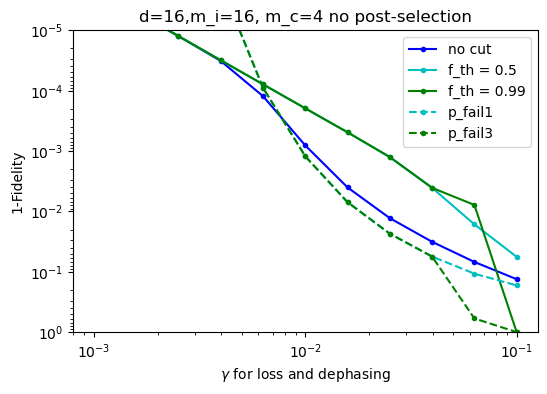

In [125]:
plt.figure(dpi=100)

legend = ["no cut", f"f_th = {fidelity_cut1}", f"f_th = {fidelity_cut2}", f"p_fail = {fidelity_cut3}"]

plt.loglog(gamma_list,1-np.array(fid_list_164), 'b.-', label="no cut")
plt.loglog(gamma_list,1-np.array(fid_list_164_cut1), 'c.-', label=f"f_th = {fidelity_cut1}")
# plt.loglog(gamma_list,1-np.array(fid_list_164_cut2), 'r.-', label=f"f_th = {fidelity_cut2}")
plt.loglog(gamma_list,1-np.array(fid_list_164_cut3), 'g.-', label=f"f_th = {fidelity_cut3}")
plt.loglog(gamma_list,np.array(prob_list_164_cut1), 'c.--', label="p_fail1")
# plt.loglog(gamma_list,np.array(prob_list_164_cut2), 'r.--', label="p_fail2")
plt.loglog(gamma_list,np.array(prob_list_164_cut3), 'g.--', label="p_fail3")
# plt.loglog(gamma_list,1-np.array(fid_list_162_NC), 'k.--')
# plt.loglog(gamma_list,1-np.array(fid_list_filtered), 'r.-')
# plt.loglog(gamma_list,np.array(fail_prob_list), 'g.--')

# plt.title("Infidelity with trivial protocol and with our protocol. d = 16, m_i = 4, m_c=4")
plt.xlabel(f"$\gamma$ for loss and dephasing")  # decay and 1/{gamma_ratio} 
plt.ylabel("1-Fidelity")
plt.ylim([1e-5,1])
plt.legend()
plt.title(f"{d=},{m_i=}, m_c=4 no post-selection")
plt.gca().invert_yaxis()

In [119]:
simulation8.average_fidelity(1e-2,1e-3,0.9)

0 0 0 0
fid=0.9999999933333334, fidelity_sum=3.999999995737367
0 0 0 1
fid=0.999999999809524, fidelity_sum=4.000005329070695
0 0 0 2
fid=0.9999999995555556, fidelity_sum=4.000805329069842
0 0 0 3
fid=0.9999999986666666, fidelity_sum=4.08080532898459
0 0 1 0
fid=0.999999999809524, fidelity_sum=4.0808106623179174
0 0 1 1
fid=0.9999999995555556, fidelity_sum=4.081610662317065
0 0 1 2
fid=0.9999999986666666, fidelity_sum=4.161610662231812
0 0 1 3
fid=0.9999999933333334, fidelity_sum=8.16161065796918
0 0 2 0
fid=0.9999999995555556, fidelity_sum=8.162410657968326
0 0 2 1
fid=0.9999999986666666, fidelity_sum=8.242410657883074
0 0 2 2
fid=0.9999999933333334, fidelity_sum=12.242410653620441
0 0 2 3
fid=0.999999999809524, fidelity_sum=12.242415986953768
0 0 3 0
fid=0.9999999986666666, fidelity_sum=12.322415986868515
0 0 3 1
fid=0.9999999933333334, fidelity_sum=16.322415982605882
0 0 3 2
fid=0.999999999809524, fidelity_sum=16.32242131593921
0 0 3 3
fid=0.9999999995555556, fidelity_sum=16.32322131

(0.9999999934391164, 1.0656586090397428e-09)

In [127]:
print(fid_list_164[10])
print(fid_list_164_cut1[10])
print(prob_list_164_cut1[10])

0.8669679687822229
0.9432435776648607
0.1687571635544367


In [163]:
d=4
m_i=4
qudit4 = EntangledQudit(d,d)

def trivial_fidelity_for_parallel(gamma, d=d, qudit4=qudit4,m_i=m_i):
    import itertools
    print(m_i)
    fid_prob = sum([(qudit4.fidelity_trivial(m_i,s_A,s_B,l_A,l_B)
                     * qudit4.p(gamma_loss_A=0, gamma_dephasing_A=gamma, s_A=s_A, s_B=s_B, l_A=l_A, l_B=l_B))
                    for s_A,s_B,l_A,l_B in itertools.product(range(d),range(d), range(d), range(d))])
    prob = sum([qudit4.p(gamma_loss_A=0, gamma_dephasing_A=gamma,
                s_A=s_A, s_B=s_B, l_A=l_A, l_B=l_B)
                for s_A,s_B,l_A,l_B in itertools.product(range(d),range(d), range(d), range(d))])
    print(np.array([(qudit4.fidelity_trivial(m_i,s_A,s_B,l_A,l_B)
                     , qudit4.p(gamma_loss_A=0, gamma_dephasing_A=gamma, s_A=s_A, s_B=s_B, l_A=l_A, l_B=l_B), s_A)
                    for s_A,s_B,l_A,l_B in itertools.product(range(d),range(d), range(d), range(d))]))
    return fid_prob/prob

trivial_fidelity_for_parallel(1e-1)



4
[[1.00000000e+00 3.89664077e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.00000007e-01 2.56706927e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.00000007e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.0000

0.9870800958251947

In [164]:
d=4
m_i = 4
m_c = 2
simulation2 = DiscreteSimulation(d, m_i,m_c)
simulation2.average_fidelity_no_communication(0,1e-1)

(0.9870800956339332, 0.0)

In [162]:
fidelity(basis(2,0),(basis(2,0)+basis(2,1)).unit())

0.7071067811865475